In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
from datetime import timedelta, datetime
import seaborn as sns

In [44]:
#Para evitar algunas advertencias
pd.options.mode.chained_assignment = None
# Seteamos los datos para Seaborn
sns.set(font_scale=1.5, rc={'figure.figsize':(14,10)})

In [45]:
#Simplemente cargamos el dataset, que exportamos terminado el notebook analisisPreliminar
df_events = pd.read_csv('../input/events_2.csv', low_memory=False)

In [46]:
#Observamos los registros
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967128 entries, 0 to 967127
Data columns (total 37 columns):
person                      967128 non-null object
index                       967128 non-null int64
timestamp                   967128 non-null object
event                       967128 non-null object
url                         79092 non-null object
sku                         540011 non-null object
model                       540438 non-null object
condition                   540009 non-null object
storage                     540009 non-null object
color                       540009 non-null object
skus                        211973 non-null object
search_term                 46473 non-null object
staticpage                  3429 non-null object
campaign_source             79133 non-null object
search_engine               48561 non-null object
channel                     83069 non-null object
new_vs_returning            83069 non-null object
city                        830

In [47]:
#hacemos una vista rapido de lo que contiene el dataset
df_events.head()

,person,index,timestamp,event,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hora,dia,mes,diaSem,diaSem2,tmpRegion,concat_address,concat_address_short,lat,lng,lat_reg,lng_reg,contador
0,0004b0a2,0,2018-05-31 23:38:05,ad campaign hit,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,31,Mayo,3,Jueves,NaN,N,N,NaN,NaN,NaN,NaN,1
1,0004b0a2,1,2018-05-31 23:38:05,visited site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,23,31,Mayo,3,Jueves,NaN,"Camaragibe, Pernambuco, Brazil","Pernambuco, Brazil",-8.00003,-34.99324,-8.322999,-37.996409,1
2,0004b0a2,2,2018-05-31 23:38:09,viewed product,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,31,Mayo,3,Jueves,NaN,N,N,NaN,NaN,NaN,NaN,1
3,0004b0a2,3,2018-05-31 23:38:40,checkout,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,31,Mayo,3,Jueves,NaN,N,N,NaN,NaN,NaN,NaN,1
4,0006a21a,4,2018-05-29 13:29:25,viewed product,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,29,Mayo,1,Martes,NaN,N,N,NaN,NaN,NaN,NaN,1


In [48]:
#Vamos a ver los enventos para tener un numero general.
df_events['event'].value_counts()
df_events['url'].value_counts()

/                                                   26981
/comprar/iphone                                      3874
/comprar/iphone/6s                                   3251
/comprar/iphone/6                                    3076
/comprar/samsung                                     2651
/comprar/iphone/iphone-5s                            2558
/comprar/samsung/galaxy-j5                           2346
/comprar/samsung/galaxy-s7-edge                      1860
/comprar/samsung/galaxy-s8                           1436
/comprar/samsung/galaxy-j7                           1408
/comprar/samsung/galaxy-s6-edge                      1373
/comprar/motorola                                    1119
/comprar/samsung/galaxy-s7                           1094
/comprar/iphone/7                                    1069
/comprar/samsung/galaxy-s6-flat                      1037
/comprar/samsung/samsung-gran-prime-duos-tv           913
/comprar/iphone/iphone-6s-plus                        911
/comprar/samsu

In [49]:
# Le asignamos el type a la columna 'timestamp
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'])
#Vamos a necesitar tener en numero el campo mes
df_events['mes_numero'] = df_events['timestamp'].apply(lambda x: x.month)

In [50]:
#Vamos a empezar a mirar los modelos que contiene el dataset
list_models = df_events['model'].value_counts().head(25)

In [51]:
#Listamos los modelos y la cantidad que aparecen por cada evento.
list_models

iPhone 6                        48475
iPhone 5s                       43126
iPhone 6S                       37646
iPhone 7                        26307
Samsung Galaxy S7 Edge          22551
Samsung Galaxy S7               18478
iPhone 7 Plus                   17886
Samsung Galaxy S8               16241
iPhone SE                       15954
Samsung Galaxy J5               12512
iPhone 5c                       12318
iPhone 6S Plus                  12187
iPhone 6 Plus                   12136
Samsung Galaxy S6 Flat          11204
Samsung Galaxy S6 Edge          10719
Samsung Galaxy S8 Plus           9938
iPhone 5                         9014
Samsung Galaxy J7 Prime          8904
Motorola Moto G4 Plus            7789
Samsung Galaxy J7                6896
Motorola Moto X Play 4G Dual     6585
Samsung Galaxy A5 2017           5664
Samsung Galaxy A7 2017           5572
Samsung Galaxy S5                5317
iPhone 4S                        5013
Name: model, dtype: int64

In [52]:
#converimos los valores a un array.
lista = list_models.index.tolist()
lista

['iPhone 6',
 'iPhone 5s',
 'iPhone 6S',
 'iPhone 7',
 'Samsung Galaxy S7 Edge',
 'Samsung Galaxy S7',
 'iPhone 7 Plus',
 'Samsung Galaxy S8',
 'iPhone SE',
 'Samsung Galaxy J5',
 'iPhone 5c',
 'iPhone 6S Plus',
 'iPhone 6 Plus',
 'Samsung Galaxy S6 Flat',
 'Samsung Galaxy S6 Edge',
 'Samsung Galaxy S8 Plus',
 'iPhone 5',
 'Samsung Galaxy J7 Prime',
 'Motorola Moto G4 Plus',
 'Samsung Galaxy J7',
 'Motorola Moto X Play 4G Dual',
 'Samsung Galaxy A5 2017',
 'Samsung Galaxy A7 2017',
 'Samsung Galaxy S5',
 'iPhone 4S']

In [53]:
#reseteamos el indice, si es que tiene.
df_events.reset_index(inplace=True)
df_events.index

RangeIndex(start=0, stop=967128, step=1)

In [54]:
#asignamos un indice para luego filtrar los valores que le pasemos en la lista.
df_events.set_index('model', inplace=True)
df_events.index

Index([                     nan,                      nan,
                    'iPhone 5s',              'iPhone 5s',
            'Samsung Galaxy S8',                      nan,
                            nan,      'Samsung Galaxy S8',
                            nan,                      nan,
       ...
                            nan,                      nan,
                            nan, 'Samsung Galaxy S7 Edge',
       'Samsung Galaxy S7 Edge', 'Samsung Galaxy S7 Edge',
                            nan,                      nan,
       'Samsung Galaxy S7 Edge', 'Samsung Galaxy S7 Edge'],
      dtype='object', name='model', length=967128)

In [55]:
#Vamos a hacer un groupby y contar la cantidad de eventos y los presentamos.
df = df_events.loc[lista, :].groupby(['model','event'])[['event']].count().unstack()
df.columns = ['checkout', 'conversion', 'lead', 'viewed product']
df.fillna(0, inplace=True)
#ordenamos por cantidad de ventas.
df.sort_values(by='conversion',ascending=False)

,checkout,conversion,lead,viewed product
model,,,,
Samsung Galaxy J5,1824.0,88.0,2.0,10598.0
iPhone 5s,2604.0,84.0,5.0,40433.0
iPhone 6,3135.0,71.0,11.0,45258.0
Samsung Galaxy S6 Flat,807.0,39.0,1.0,10357.0
iPhone 6S,2208.0,37.0,19.0,35382.0
iPhone 5c,571.0,33.0,4.0,11710.0
Motorola Moto G4 Plus,486.0,30.0,19.0,7254.0
Samsung Galaxy J7,749.0,28.0,2.0,6117.0
Samsung Galaxy J7 Prime,818.0,20.0,25.0,8041.0


In [56]:
#sumamos los eventos y los agregamos y filtramos.
df['total_events'] = df['checkout'] +  df['conversion'] + df['lead'] + df['viewed product']
#filtramos por cantidad de eventos..
df.head(25).sort_values(by='total_events', ascending=False)

,checkout,conversion,lead,viewed product,total_events
model,,,,,
iPhone 6,3135.0,71.0,11.0,45258.0,48475.0
iPhone 5s,2604.0,84.0,5.0,40433.0,43126.0
iPhone 6S,2208.0,37.0,19.0,35382.0,37646.0
iPhone 7,1167.0,16.0,5.0,25119.0,26307.0
Samsung Galaxy S7 Edge,796.0,17.0,4.0,21734.0,22551.0
Samsung Galaxy S7,1166.0,18.0,0.0,17294.0,18478.0
iPhone 7 Plus,867.0,6.0,9.0,17004.0,17886.0
Samsung Galaxy S8,1036.0,15.0,2.0,15188.0,16241.0
iPhone SE,595.0,17.0,4.0,15338.0,15954.0


In [57]:
#vemos un pantallazo de los datos...
df.describe()
df2 = df['viewed product']


In [58]:
#vemos la cantidad de ventas realizadas entre los primeros 25 productos
print("Ventas totales: {} | Total de ventas 25 tipos productos: {} | participación: {:.2f}%".format(df_events['event'].value_counts()['conversion'],
                                                                                         df['conversion'].sum(),
                                                                                        df['conversion'].sum()/df_events['event'].value_counts()['conversion']*100))

Ventas totales: 1172 | Total de ventas 25 tipos productos: 640.0 | participación: 54.61%


In [59]:
#Empezamos a realizar un analisis basado en las marcas de los productos.
df_events.reset_index(inplace=True)
df_events.index

RangeIndex(start=0, stop=967128, step=1)

In [60]:
df_events['Marca'] = "NaN"
df_events['model'].fillna("-",inplace=True)
df_events.loc[df_events['model'].str.contains('iPhone'), 'Marca'] = "iPhone"
df_events.loc[df_events['model'].str.contains('Samsung'), 'Marca'] = "Samsung"
df_events.loc[df_events['model'].str.contains('Motorola'), 'Marca'] = 'Motorola'
df_events.loc[df_events['model'].str.contains('Nokia'), 'Marca'] = 'Nokia'
df_events.loc[df_events['model'].str.contains('iPad'), 'Marca'] = 'iPad'
df_events.loc[df_events['model'].str.contains('Sony'), 'Marca'] = 'Sony'
df_events.loc[df_events['model'].str.contains('Quantum'), 'Marca'] = 'Quantum'
df_events.loc[df_events['model'].str.contains('Blackberry'), 'Marca'] = 'Blackberry'
df_events.loc[df_events['model'].str.contains('LG'), 'Marca'] = 'LG'
df_events.loc[df_events['model'].str.contains('Asus'), 'Marca'] = 'Asus'
df_events.loc[df_events['model'].str.contains('Lenovo'), 'Marca'] = 'Lenovo'
#hay que darle formato category a este campo....

df_events.loc[df_events['event'] =='conversion']

,model,level_0,person,index,timestamp,event,url,sku,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hora,dia,mes,diaSem,diaSem2,tmpRegion,concat_address,concat_address_short,lat,lng,lat_reg,lng_reg,contador,mes_numero,Marca
220,Motorola Moto X2,220,00204059,220,2018-03-20 17:46:12,conversion,NaN,3084.0,Muito Bom,32GB,Couro Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,20,Marzo,1,Martes,NaN,N,N,NaN,NaN,NaN,NaN,1,3,Motorola
2251,Samsung Galaxy Core Plus Duos TV,2251,00c13dee,2282,2018-04-26 22:28:53,conversion,NaN,6650.0,Muito Bom,4GB,Branco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,26,Abril,3,Jueves,NaN,N,N,NaN,NaN,NaN,NaN,1,4,Samsung
2497,Samsung Galaxy S6 Flat,2497,00fdbb4b,2547,2018-06-10 14:37:50,conversion,NaN,3348.0,Muito Bom,32GB,Branco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,10,Junio,6,Domingo,NaN,N,N,NaN,NaN,NaN,NaN,1,6,Samsung
4145,iPhone 5s,4145,0146a9df,4245,2018-03-16 13:50:25,conversion,NaN,2694.0,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,16,Marzo,4,Viernes,NaN,N,N,NaN,NaN,NaN,NaN,1,3,iPhone
6859,Samsung Galaxy J5,6859,01db2fe6,6985,2018-02-09 22:07:07,conversion,NaN,6357.0,Bom,16GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,9,Febrero,4,Viernes,NaN,N,N,NaN,NaN,NaN,NaN,1,2,Samsung
9846,Samsung Galaxy A5,9846,02a6f9b5,10005,2018-05-17 02:20:29,conversion,NaN,3203.0,Bom,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,17,Mayo,3,Jueves,NaN,N,N,NaN,NaN,NaN,NaN,1,5,Samsung
13814,Samsung Galaxy S6 Edge,13814,03bdcd81,14236,2018-01-09 16:47:50,conversion,NaN,3301.0,Excelente,32GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,9,Enero,1,Martes,NaN,N,N,NaN,NaN,NaN,NaN,1,1,Samsung
14853,LG K10 Novo,14853,042a2a99,15278,2018-05-15 02:31:34,conversion,NaN,15745.0,Excelente,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,15,Mayo,1,Martes,NaN,N,N,NaN,NaN,NaN,NaN,1,5,LG
16256,iPhone 6,16256,04850add,16800,2018-01-23 22:26:36,conversion,NaN,2830.0,Bom,16GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,23,Enero,1,Martes,NaN,N,N,NaN,NaN,NaN,NaN,1,1,iPhone
17935,Samsung Galaxy J5,17935,04fbc241,18502,2018-01-10 18:59:05,conversion,NaN,6370.0,Muito Bom,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,10,Enero,2,Miércoles,NaN,N,N,NaN,NaN,NaN,NaN,1,1,Samsung


In [61]:
df_events['model'].value_counts()

-                                            426690
iPhone 6                                      48475
iPhone 5s                                     43126
iPhone 6S                                     37646
iPhone 7                                      26307
Samsung Galaxy S7 Edge                        22551
Samsung Galaxy S7                             18478
iPhone 7 Plus                                 17886
Samsung Galaxy S8                             16241
iPhone SE                                     15954
Samsung Galaxy J5                             12512
iPhone 5c                                     12318
iPhone 6S Plus                                12187
iPhone 6 Plus                                 12136
Samsung Galaxy S6 Flat                        11204
Samsung Galaxy S6 Edge                        10719
Samsung Galaxy S8 Plus                         9938
iPhone 5                                       9014
Samsung Galaxy J7 Prime                        8904
Motorola Mot

In [62]:
filt = df_events.loc[(df_events['Marca'] == "NaN")]
#checkout	conversion	lead	viewed product	
filt['event'].value_counts()

brand listing        94824
visited site         83069
ad campaign hit      79157
generic listing      64379
searched products    53269
search engine hit    48561
staticpage            3429
checkout                 2
Name: event, dtype: int64

In [63]:
#Estos registros son erroneos.
filt.loc[filt['event'] == 'checkout']

,model,level_0,person,index,timestamp,event,url,sku,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hora,dia,mes,diaSem,diaSem2,tmpRegion,concat_address,concat_address_short,lat,lng,lat_reg,lng_reg,contador,mes_numero,Marca
350631,-,350631,602b3649,368097,2018-05-22 13:53:14,checkout,NaN,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,22,Mayo,1,Martes,NaN,N,N,NaN,NaN,NaN,NaN,1,5,NaN
368880,-,368880,655402b0,387149,2018-05-22 13:44:53,checkout,NaN,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,22,Mayo,1,Martes,NaN,N,N,NaN,NaN,NaN,NaN,1,5,NaN


In [64]:
df_marcas = df_events.loc[df_events['Marca'] != 'NaN'].groupby(['Marca','event'])[['event']].count().unstack()
df_marcas.columns = ['checkout', 'conversion', 'lead', 'viewed product']
df_marcas.fillna(0, inplace=True)
df_marcas.sort_values(by='conversion',ascending=False)

,checkout,conversion,lead,viewed product
Marca,,,,
Samsung,13997.0,641.0,125.0,194040.0
iPhone,13415.0,323.0,157.0,231712.0
Motorola,3572.0,149.0,81.0,57431.0
Sony,212.0,23.0,2.0,6504.0
LG,533.0,20.0,43.0,8666.0
Lenovo,253.0,14.0,10.0,4265.0
Asus,60.0,2.0,3.0,1831.0
Blackberry,0.0,0.0,1.0,0.0
Quantum,15.0,0.0,4.0,468.0


In [65]:
#vamos a hacer un grafico que muestre la evolucion de las ventas en el tiempo.
#df_events['mes'] = df_events['mes'].astype('category')

df_marcas = df_events.loc[(df_events['Marca'] != 'NaN') & (df_events['event']=='conversion') & (df_events['mes'] != 'Junio')].groupby(['Marca','mes_numero'])[['contador']].sum().unstack(0)
#df_marcas.columns = ['Asus', 'LG', 'Lenovo', 'Motorola', 'Samsung', 'Sony', 'iPhone']
#df_marcas.index = ['4 - Abril', '1 - Enero', '2 - Febrero', '6 - Junio', '3 - Marzo', '5 - Mayo']
#df_marcas.index = df_marcas.index.sort_values()
df_marcas.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo']

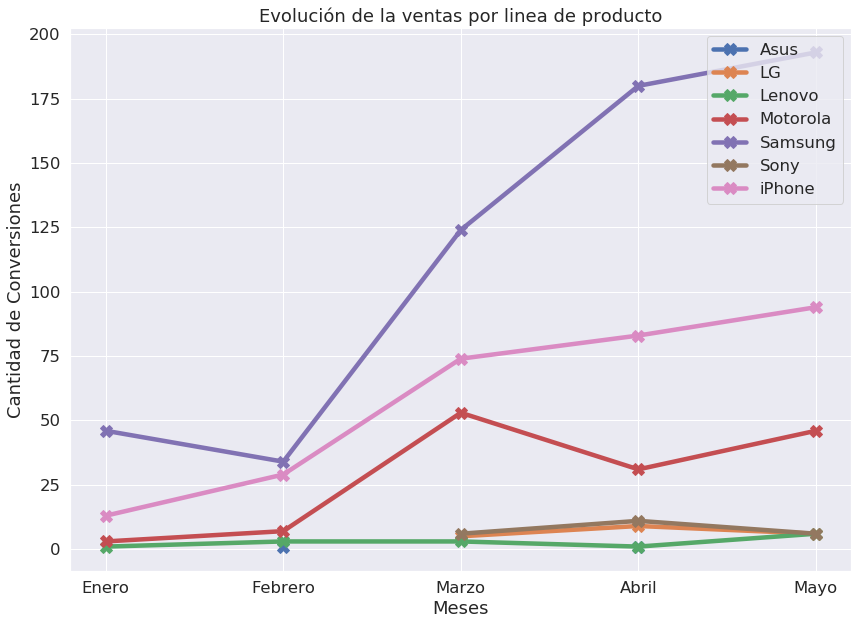

In [66]:
labels = df_marcas.columns.get_level_values(1)
plt.plot(df_marcas, linewidth=4.5, marker='X', markersize=12)
plt.grid(True)
plt.title("Evolución de la ventas por linea de producto")
plt.ylabel("Cantidad de Conversiones")
plt.xlabel("Meses")
plt.legend(labels, loc="upper right")
plt.show()

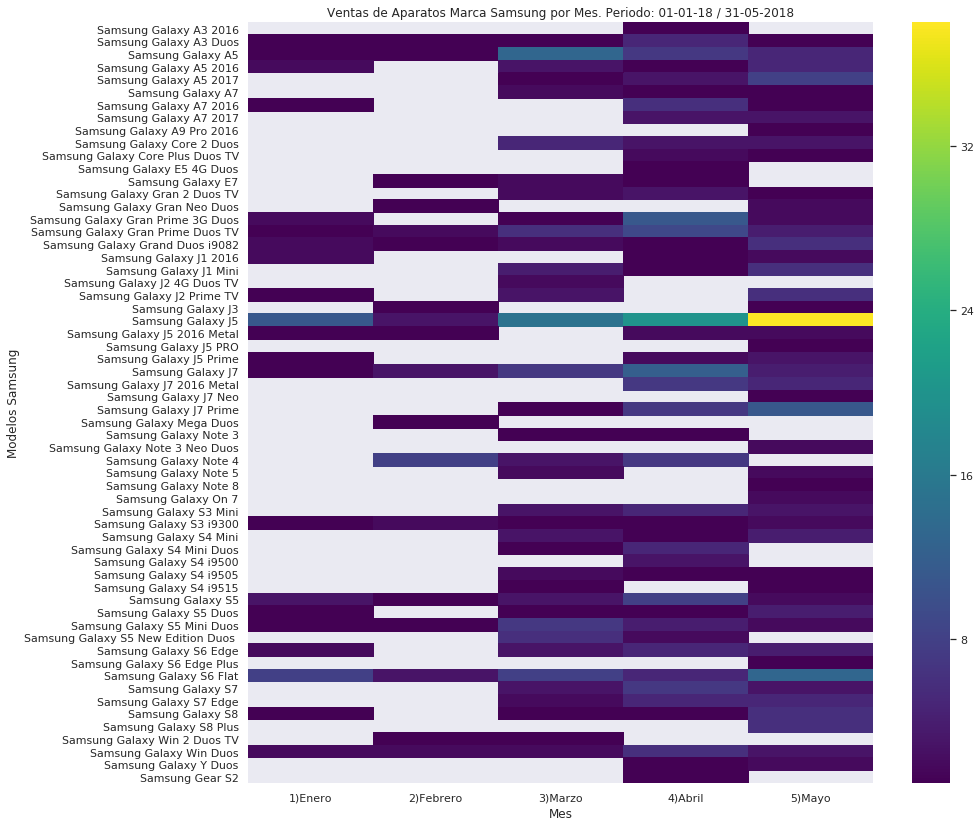

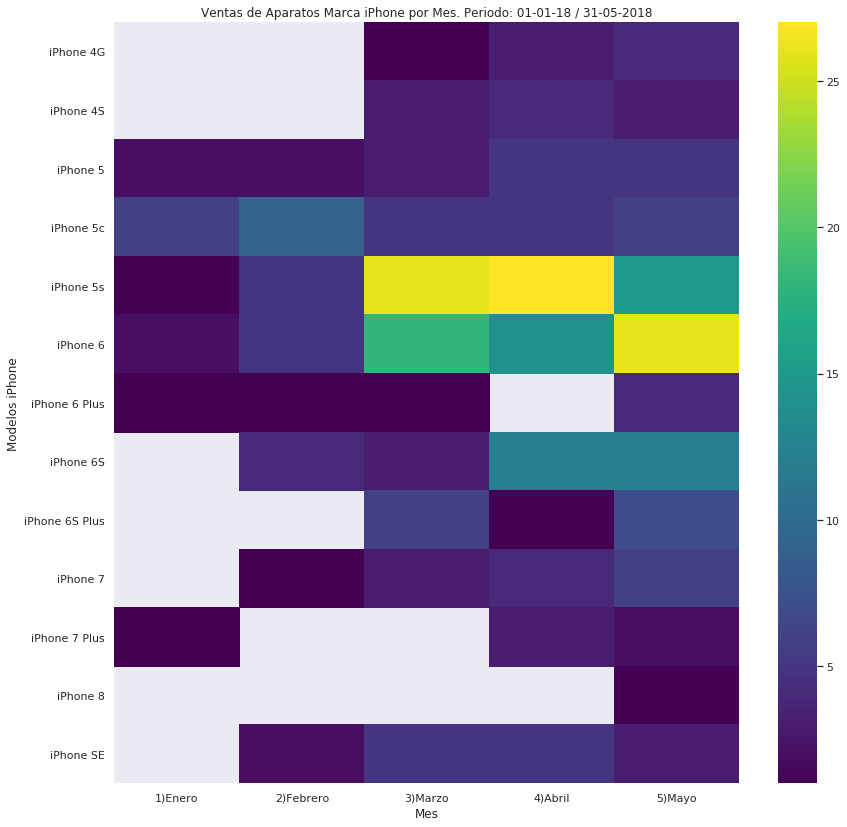

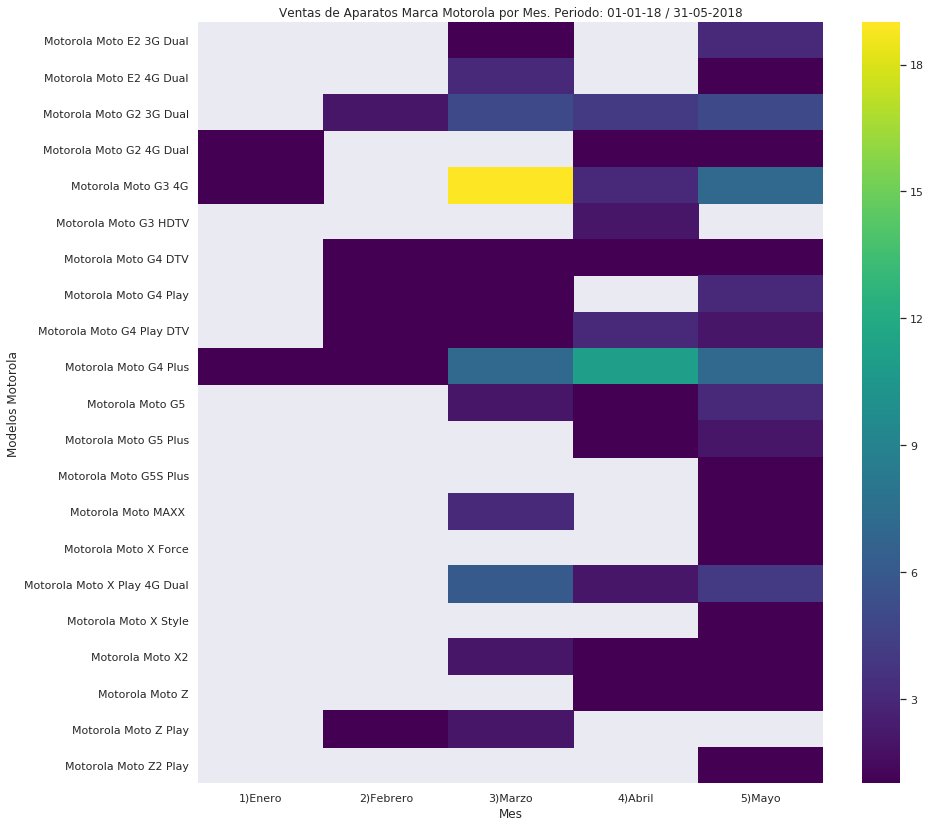

In [67]:
#Controlar que efectivamente los campos son correctos.
marcas_a_analizar = ['Samsung', 'iPhone', 'Motorola']
sns.set(font_scale=1 , rc={'figure.figsize':(14,14)})
for i in marcas_a_analizar:
    df_detalle_marca  = df_events \
                                .loc[(df_events['Marca'] == i) & (df_events['event']=='conversion') & (df_events['mes'] != 'Junio')] \
                                .groupby(['model','mes_numero'])['contador'].sum()
    df_detalle_marca = df_detalle_marca.reset_index(name='contador')
    listaMeses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
    df_detalle_marca['mes_numero'] = df_detalle_marca['mes_numero'].apply(lambda x: str(x) + ")" + listaMeses[x-1]  )
    grafico2 = sns.heatmap(df_detalle_marca.pivot("model", "mes_numero", "contador"),  cmap="viridis", annot_kws={"size": 10})
    grafico2.set_xlabel('Mes')
    grafico2.set_ylabel('Modelos {}'.format(i))
    grafico2.set_title("Ventas de Aparatos Marca {} por Mes. Periodo: 01-01-18 / 31-05-2018".format(i))
    #plt.savefig("./graficos/grafico16.png", bbox_inches='tight')
    plt.show()
sns.set(font_scale=1.5, rc={'figure.figsize':(14,10)})

In [68]:
def generarSesion(user):
    return user + "-" + str(randrange(9999))

In [69]:
#Vamos a crear Sesiones de Usuarios.
#Vamos a trabajar con series para no ocupar toda la memoria.
serie_person = df_events['person']
serie_timestamp = df_events['timestamp']
i = 1

script_init_time =  datetime.now() #Para controlar cuanto tiempo tarda el script.
#primera carga
sesion = generarSesion(serie_person[0])
array_sesiones = []
array_sesiones.append(sesion)

#primer chacheo de hora.
cmp_hora = str(serie_timestamp[0] + timedelta(hours=3))

#comenzamos a recorrer toda la de "person" desde el valor 1.
for person in serie_person[1:]:
    if(person == serie_person[i-1]): #si Es igual seguimos dentro del mismo campo, no hay que generar una nueva sesion
        if(cmp_hora > str(serie_timestamp[i])):
            array_sesiones.append(sesion) #agremos a nuestro array una nueva sesion
        else:
            sesion = generarSesion(person) #Si ingreso aqui es otro usuario, necesitamos:
            array_sesiones.append(sesion) #generar una nueva sesion y 
            cmp_hora = str(serie_timestamp[i] + timedelta(hours=3)) #cachaear una nueva fecha
    else:
        sesion = generarSesion(person) #Si es una persona distinta, tambien debemos generar una sesion
        array_sesiones.append(sesion) # agregarla
        cmp_hora = str(serie_timestamp[i] + timedelta(hours=3)) #Y cachear una nueva hora.
        
    i += 1
    
    
script_fin_time =  datetime.now()
print("tiempo del script: {}".format(script_fin_time - script_init_time))

tiempo del script: 0:00:26.664135


In [70]:
df_events['sesiones'] = pd.Series(array_sesiones)
df_events['sesiones'].value_counts()

285101a1-5609    327
d1c8b60a-2156    295
7564cd4d-342     276
3444791f-2298    274
8ed961fb-8671    261
cfe2c53c-8997    243
b92cd307-2947    235
e0cfc814-1010    219
7c9113eb-5303    207
ee3a6cd3-4885    200
29e9b54b-5048    198
b3e36414-3654    197
285101a1-7495    195
568e8b5b-6444    195
cd6e0b8d-6437    194
cd6e0b8d-8576    193
f2bc0a68-9912    188
63112254-3767    188
3b1e38db-8208    187
7e2fe5c2-3335    183
2c30611c-9819    181
7d709d2e-9896    180
f3b4afa1-9745    180
ad5b0648-1057    176
d8defcb1-2393    173
c6f055e6-8556    173
9b84e6e9-7840    172
e0ec4077-6361    170
cd6e0b8d-7748    170
810527cb-4019    168
                ... 
805c97b7-8612      1
8bc0db24-4543      1
8b374aee-2858      1
2418b9a4-681       1
e0ec4077-6130      1
18b2e115-773       1
2c442cad-8692      1
04850add-1438      1
9da20fc6-9916      1
0994718b-4035      1
ee67011e-8998      1
895d26f5-1111      1
6d4e9cf9-2601      1
d8427c79-6242      1
58692743-9696      1
24407528-8300      1
93d46e30-4981

In [72]:
person_con_conversiones = df_events.loc[df_events['event']=="conversion", 'person']
#df_events.reset_index(inplace=True)
df_events.set_index('person', inplace=True)

In [73]:
person_con_conversiones = person_con_conversiones.values.tolist()

In [74]:
df_con_conversiones = df_events.loc[person_con_conversiones]

In [75]:
df_con_conversiones.head()

,model,level_0,index,timestamp,event,url,sku,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hora,dia,mes,diaSem,diaSem2,tmpRegion,concat_address,concat_address_short,lat,lng,lat_reg,lng_reg,contador,mes_numero,Marca,sesiones
person,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00204059,-,115,115,2018-01-18 00:19:28,generic listing,NaN,NaN,NaN,NaN,NaN,"3889,3853,3961,7071,7083,7028,1429,4033,12674,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18,Enero,3,Jueves,NaN,N,N,NaN,NaN,NaN,NaN,1,1,NaN,00204059-3513
00204059,-,116,116,2018-01-18 00:19:39,visited site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Direct,New,Unknown,Unknown,Brazil,Computer,1024x600,Windows 7,Chrome 63.0,0,18,Enero,3,Jueves,Unknown,"Unknown, Unknown, Brazil","Unknown, Brazil",-15.77843,-47.92865,-10.769946,-53.073467,1,1,NaN,00204059-3513
00204059,-,117,117,2018-01-31 16:54:28,generic listing,NaN,NaN,NaN,NaN,NaN,"3853,12730,4033,12674,6959,4056,11022,13670,33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,31,Enero,2,Miércoles,NaN,N,N,NaN,NaN,NaN,NaN,1,1,NaN,00204059-3775
00204059,-,118,118,2018-01-31 16:54:29,visited site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Social,Returning,Unknown,Unknown,Brazil,Computer,1024x600,Windows 7,Chrome 63.0,16,31,Enero,2,Miércoles,Unknown,"Unknown, Unknown, Brazil","Unknown, Brazil",-15.77843,-47.92865,-10.769946,-53.073467,1,1,NaN,00204059-3775
00204059,-,119,119,2018-01-31 16:54:29,ad campaign hit,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FacebookAds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,31,Enero,2,Miércoles,NaN,N,N,NaN,NaN,NaN,NaN,1,1,NaN,00204059-3775


In [76]:
#Cuantas veces ingresa en promedio la persona:
df_con_conversiones.groupby('sesiones')[['sesiones']].count().describe()

,sesiones
count,10280.000000
mean,25.013619
std,44.809163
min,1.000000
25%,4.000000
50%,10.000000
75%,27.000000
max,812.000000


In [77]:
df_group_actividad = df_con_conversiones.groupby(['sesiones','event'])[['event']].count().unstack()
df_group_actividad.reset_index(inplace=True)
df_group_actividad.columns = df_group_actividad.columns.get_level_values(1)

In [78]:
df_group_actividad = df_group_actividad.loc[df_group_actividad['conversion']>0]

In [79]:
df_group_actividad

event,,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
4,00204059-5327,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,00c13dee-7540,1.0,34.0,4.0,1.0,4.0,NaN,1.0,NaN,1.0,10.0,2.0
21,00fdbb4b-980,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
24,0146a9df-358,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0
52,01db2fe6-8040,8.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,17.0,2.0
61,02a6f9b5-707,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,03bdcd81-7792,1.0,1.0,1.0,1.0,3.0,NaN,1.0,NaN,NaN,59.0,1.0
83,042a2a99-3501,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
107,04850add-7364,NaN,11.0,2.0,1.0,2.0,NaN,2.0,NaN,NaN,46.0,1.0
125,04fbc241-6417,5.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,5.0,6.0,2.0


In [ ]:
df_group_actividad.describe()